In [1]:
# switch to the project directory
%cd ..
# working directory should be ../FSE

c:\Users\admin\Desktop\research\pdi


In [2]:
import sys
import os
module_path = os.path.abspath('src')

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np

from pdi.data.constants import INPUT_PATH, CSV_DELIMITER, MISSING_VALUES

data = pd.read_csv(INPUT_PATH, sep=CSV_DELIMITER, index_col=0)
for column, val in MISSING_VALUES.items():
    data.loc[data[column] == val, column] = np.NaN

In [4]:
print(data.shape)

(2751934, 22)


In [5]:
classes = data["fPdgCode"].value_counts()
print(classes)
chosen_classes=[-211, 211, 321, -321, 2212, -2212]

num_chosen = classes[chosen_classes].sum()
print(num_chosen)
print(num_chosen / data.shape[0])

-211           1201576
 211           1199557
 321             93982
-321             90488
 2212            55748
-2212            50057
 11              21840
-11              20978
 13               8880
-13               8825
 1000010030          2
 1000010020          1
Name: fPdgCode, dtype: int64
2691408
0.9780060132256079


In [38]:
print(classes / classes.sum())

-211           4.366297e-01
 211           4.358960e-01
 321           3.415126e-02
-321           3.288160e-02
 2212          2.025775e-02
-2212          1.818975e-02
 11            7.936237e-03
-11            7.623003e-03
 13            3.226822e-03
-13            3.206836e-03
 1000010030    7.267616e-07
 1000010020    3.633808e-07
Name: fPdgCode, dtype: float64


In [7]:
nulls = data.isnull().sum()
print(nulls)

fTPCSignal                  0
fTRDSignal            1047980
fTRDPattern           1047980
fTOFSignal            1692076
fBeta                 1692076
fP                          0
fPt                         0
fPx                         0
fPy                         0
fPz                         0
fSign                       0
fX                          0
fY                          0
fZ                          0
fAlpha                      0
fTrackType                  0
fTPCNClsShared              0
fDcaXY                      0
fDcaZ                       0
fPdgCode                    0
fIsPhysicalPrimary          0
P                           0
dtype: int64


In [8]:
null_rows = data.isnull().value_counts()

columns = data.columns
missing_values = [columns[list(index)] for index in null_rows.index]
print(missing_values, null_rows.values)

[Index([], dtype='object'), Index(['fTRDSignal', 'fTRDPattern', 'fTOFSignal', 'fBeta'], dtype='object'), Index(['fTOFSignal', 'fBeta'], dtype='object'), Index(['fTRDSignal', 'fTRDPattern'], dtype='object')] [1021933 1010055  682021   37925]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


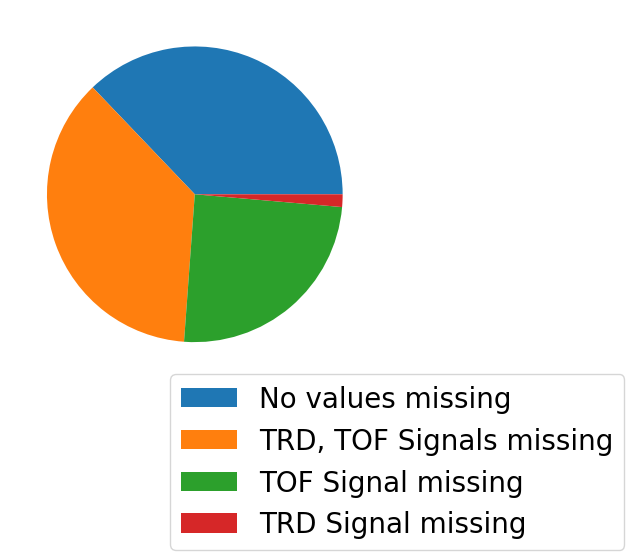

In [36]:
from matplotlib import pyplot as plt
plt.pie(null_rows)
plt.legend(
    ["No values missing",
    "TRD, TOF Signals missing",
    "TOF Signal missing",
    "TRD Signal missing"], loc="lower right", bbox_to_anchor=(1.7, -0.5), prop={'size': 20}
)

plt.savefig(f"reports/figures/miss_val_distr.eps", bbox_inches = "tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


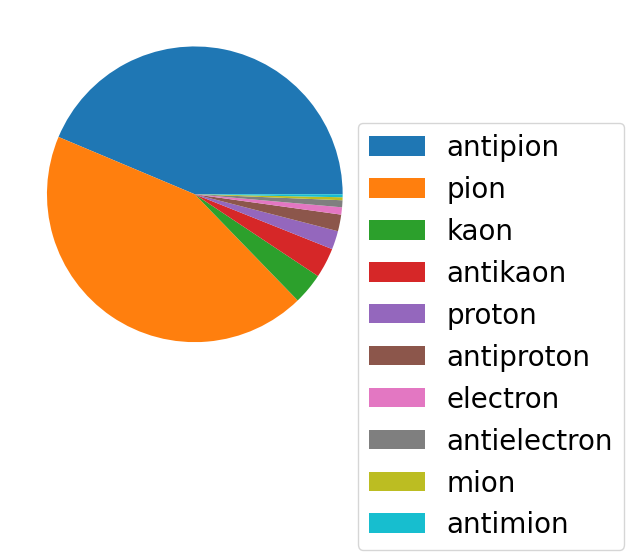

In [37]:
from pdi.constants import PARTICLES_DICT
particles = [classes[i] for i in classes.index if i in PARTICLES_DICT]
labels = [PARTICLES_DICT[i] for i in classes.index if i in PARTICLES_DICT]

plt.pie(particles)
plt.legend(
    labels, loc="lower right", bbox_to_anchor=(1.7, -0.5), prop={'size': 20}
)

plt.savefig(f"reports/figures/part_type_distr.eps", bbox_inches = "tight")

In [11]:
all_nulls = data.isnull().any(axis=1).sum()
print(all_nulls)
print(all_nulls/data.shape[0])

1730001
0.6286491609173767
